In [9]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import datasets
import tensorflow
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, GlobalAveragePooling2D, Softmax
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



In [10]:
train = pd.read_csv("mnist_train.csv")
train_reduced=train[0:3000]

In [11]:
#train = train.assign(label=0)
#40% will be noisy data (12000/30000)
noisy_train=train[7000:8000]
noise_factor = 0.5
clean_signal = pd.DataFrame(noisy_train, dtype=float) 
clean_signal = noisy_train.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(1000, 784)) 
x_train_noisy = np.clip(x_train_noisy, -0.4, 0.3)
label=noisy_train['label']
train_noisy = pd.concat([label,x_train_noisy], axis=1)
#train_noisy = train_noisy.assign(label=1)
label_train_noise=train_noisy['label']
train_all = pd.concat([train_reduced,train_noisy],ignore_index=True)

#with noise
df_x_noisy=train_all.iloc[:,1:]
df_y_noisy=train_all.iloc[:,0]

#without noise
df_x=train_reduced.iloc[:,1:]
df_y=train_reduced.iloc[:,0]

#Check the frequency of each number
df_y.value_counts().sort_index()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0,shuffle=True)



In [12]:
X_train.shape,X_test.shape

((2400, 784), (600, 784))

In [7]:
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = train_noisy.drop('label', axis=1).iloc[row].values
    #vec = X_test.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat

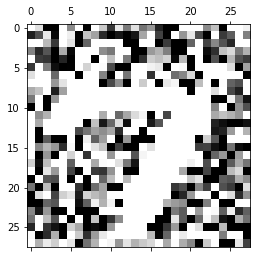

In [8]:
plt.matshow(pixel_mat(1), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [15]:
from tensorflow.keras.utils import to_categorical
Y_cat_test = to_categorical(y_test,10)
Y_cat_train = to_categorical(y_train,10)


In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [17]:
Y_cat_train.shape,Y_cat_test.shape

((2400, 10), (600, 10))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
##model = Sequential()
#model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu' ))
#model.add(Dropout(0.5))
#model.add(Dense(25, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(10, activation='softmax'))

#model.compile(loss='categorical_crossentropy',
 #             optimizer='adam',
  #            metrics=['accuracy'])

In [19]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
#model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 




In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 32)                640032    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 640,906
Trainable params: 640,906
Non-trainable params: 0
_________________________________________________________________


In [21]:
X_train.shape,Y_cat_train.shape,X_test.shape,Y_cat_test.shape

((2400, 28, 28, 1), (2400, 10), (600, 28, 28, 1), (600, 10))

In [22]:
model.fit(X_train,Y_cat_train,epochs=8,validation_data=(X_test,Y_cat_test))

Epoch 1/8
75/75 [==============================] - 6s 27ms/step - loss: 0.8061 - accuracy: 0.7500 - val_loss: 0.4456 - val_accuracy: 0.8650
Epoch 2/8
75/75 [==============================] - 2s 23ms/step - loss: 0.3099 - accuracy: 0.9158 - val_loss: 0.3185 - val_accuracy: 0.9100
Epoch 3/8
75/75 [==============================] - 2s 28ms/step - loss: 0.1802 - accuracy: 0.9500 - val_loss: 0.2842 - val_accuracy: 0.9117
Epoch 4/8
75/75 [==============================] - 2s 26ms/step - loss: 0.0990 - accuracy: 0.9771 - val_loss: 0.2769 - val_accuracy: 0.9317
Epoch 5/8
75/75 [==============================] - 2s 20ms/step - loss: 0.0631 - accuracy: 0.9842 - val_loss: 0.2833 - val_accuracy: 0.9300
Epoch 6/8
75/75 [==============================] - 2s 25ms/step - loss: 0.0417 - accuracy: 0.9912 - val_loss: 0.2715 - val_accuracy: 0.9283
Epoch 7/8
75/75 [==============================] - 2s 27ms/step - loss: 0.0242 - accuracy: 0.9950 - val_loss: 0.2671 - val_accuracy: 0.9350
Epoch 8/8
75/75 [===

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: in user code:

    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/engine/training.py", line 1501, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/engine/training.py", line 949, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/losses.py", line 1788, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "/opt/miniconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [24]:
list(map(lambda x: x.name, model.layers))

['conv2d', 'flatten', 'dense', 'dense_1']

In [27]:
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)



In [26]:
intermediate_layer_model

In [ ]:
resized_images=[]
for image in X_train:
    image=image.reshape((1,28,28,1))
    resized_images.append(image)

In [ ]:
output=[]
for image in resized_images:
    intermediate_output = intermediate_layer_model.predict(image)
    output.append(intermediate_output)

In [ ]:
y=np.array([np.array(xi) for xi in output])
print(y.shape)

In [ ]:
y_new=y.reshape(y.shape[0],10)
y_new.shape

In [ ]:
import pandas
pd = pandas.DataFrame(y_new)
pd.to_csv("second_layer_dense.csv", index=False, header=False,line_terminator=',\n')

In [ ]:
import pandas as pd
first = pd.read_csv("first_layer_dense.csv")
second=pd.read_csv("second_layer_dense.csv")
all_layers = pd.concat([first, second])
pd = pandas.DataFrame(all_layers)
pd.to_csv("all_layers.csv", index=False, header=False,line_terminator=',\n')

### Generate Noisy samples

In [ ]:
df_x_noisy=train_noisy.iloc[:,1:]
df_y_noisy=train_noisy.iloc[:,0]
df_y.value_counts().sort_index()
#Split the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_x_noisy, df_y_noisy, test_size=0.2, random_state=0,shuffle=True)

X_train2.shape,X_test2.shape


In [ ]:
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = train_noisy.drop('label', axis=1).iloc[row].values
    #vec = X_test.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat

In [ ]:
plt.matshow(pixel_mat(4), cmap=plt.cm.gray)
plt.show()

In [ ]:
X_train2.shape, X_test2.shape

In [ ]:
X_train2=X_train2/255
X_test2=X_test2/255
X_train2=X_train2.to_numpy()
X_test2=X_test2.to_numpy()
from tensorflow.keras.utils import to_categorical
Y_cat_test2 = to_categorical(y_test2,10)
Y_cat_train2 = to_categorical(y_train2,10)
X_train2 = X_train2.reshape(X_train2.shape[0], 28, 28,1)
X_test2 = X_test2.reshape(X_test2.shape[0],28,28,1)
X_test2.shape,Y_cat_test2.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
#model.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 




In [ ]:
model2.fit(X_train2,Y_cat_train2,epochs=16,validation_data=(X_test2,Y_cat_test2))

In [ ]:
list(map(lambda x: x.name, model2.layers))

In [ ]:
from tensorflow.keras.models import Model
#check the names of the layers above
intermediate_layer_model2 = Model(inputs=model2.input, outputs=model2.get_layer('dense_2').output)

In [ ]:
resized_images=[]
for image in X_train2:
    image=image.reshape((1,28,28,1))
    resized_images.append(image)

In [ ]:
output=[]
for image in resized_images:
    intermediate_output = intermediate_layer_model2.predict(image)
    output.append(intermediate_output)

In [ ]:
y3=np.array([np.array(xi) for xi in output])
print(y3.shape)

In [ ]:
y_new3=y3.reshape(y3.shape[0],y3.shape[2])
y_new3.shape

In [ ]:
import pandas 
import pandas as pd
pd = pandas.DataFrame(y_new3)
pd.to_csv("noisy_samples_first_layer_32.csv", index=False, header=False,line_terminator=',\n')

### Generating good  data for predictions

In [ ]:
train_reduced2=train[7000:9000]

In [ ]:
df_x_good=train_reduced2.iloc[:,1:]
df_y_good=train_reduced2.iloc[:,0]

In [ ]:
#Check the frequency of each number
df_y_good.value_counts().sort_index()

#Split the dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_x_good, df_y_good, test_size=0.2, random_state=0,shuffle=True)

In [ ]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

In [ ]:
X_train3=X_train3/255
X_test3=X_test3/255

In [ ]:
X_train3=X_train3.to_numpy()
X_test3=X_test3.to_numpy()

In [ ]:
from tensorflow.keras.utils import to_categorical
Y_cat_test3 = to_categorical(y_test3,10)
Y_cat_train3 = to_categorical(y_train3,10)
X_train3 = X_train3.reshape(X_train3.shape[0], 28, 28,1)
X_test3 = X_test3.reshape(X_test3.shape[0],28,28,1)
Y_cat_train3.shape,Y_cat_test3.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
#model.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 


In [ ]:
X_train3.shape,Y_cat_train3.shape,X_test3.shape,Y_cat_test3.shape

In [ ]:
model3.fit(X_train3,Y_cat_train3,epochs=32,validation_data=(X_test3,Y_cat_test3))

In [ ]:
list(map(lambda x: x.name, model3.layers))

In [ ]:
from tensorflow.keras.models import Model
#from keras.models import Model

#check the names of the layers above
intermediate_layer_model3 = Model(inputs=model3.input, outputs=model3.get_layer('dense_11').output)

In [ ]:
resized_images=[]
for image in X_train3:
    image=image.reshape((1,28,28,1))
    resized_images.append(image)

In [ ]:
output=[]
for image in resized_images:
    intermediate_output = intermediate_layer_model3.predict(image)
    output.append(intermediate_output)

In [ ]:
y=np.array([np.array(xi) for xi in output])
print(y.shape)

In [ ]:
y_new=y.reshape(y.shape[0],y.shape[2])
y_new.shape

In [ ]:
import pandas
pd = pandas.DataFrame(y_new)
pd.to_csv("good_data_first_layer_32.csv", index=False, header=False,line_terminator=',\n')

In [ ]:
import pandas
pd = pandas.DataFrame(y_new)
pd.to_csv("good_data_second_layer_10.csv", index=False, header=False,line_terminator=',\n')

### More noisy data

In [ ]:
train = pd.read_csv("mnist_train.csv")
noisy_train=train[8000:9000]

In [ ]:
noisy_train.shape

In [ ]:
noisy_different = pd.read_csv("different_kind_noise_samples.csv")
#noisy_different=np.array(noisy_different).reshape(noisy_different.shape[0],785)

In [ ]:
noise_factor = 0.5
clean_signal = pd.DataFrame(noisy_train, dtype=float) 
clean_signal = noisy_train.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(1000, 784)) 
x_train_noisy = np.clip(x_train_noisy, -0.4, 0.3)
label=noisy_train['label']
#train_noisy = pd.concat([noisy_different,x_train_noisy], axis=0)
train_noisy = pd.concat([label,x_train_noisy], axis=1)

#label_train_noise=train_noisy['label']
#train_all = pd.concat([train_reduced,train_noisy],ignore_index=True)

In [ ]:
noisy_different=noisy_different.drop(columns='Unnamed: 784')

In [ ]:
label_6=np.repeat(6, noisy_different.shape[0])
noisy_different.insert(loc=0, column='label', value=label_6)

In [ ]:
train_noisy=pd.concat([noisy_different,x_train_noisy], axis=1)

In [ ]:
#new=pd.merge(noisy_different, x_train_noisy, on='label')

In [ ]:
#noisy_different
noisy_different =noisy_different.drop(columns='Unnamed: 784')

In [ ]:
noisy_different

In [ ]:
df_x_noisy=train_noisy.iloc[:,1:]
df_y_noisy=train_noisy.iloc[:,0]


df_y.value_counts().sort_index()
#Split the dataset
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_x_noisy, df_y_noisy, test_size=0.2, random_state=0,shuffle=True)



X_train4=X_train4/255
X_test4=X_test4/255


X_train4=X_train4.to_numpy()
X_test4=X_test4.to_numpy()

from tensorflow.keras.utils import to_categorical
Y_cat_test4= to_categorical(y_test4,10)
Y_cat_train4 = to_categorical(y_train4,10)

X_train4 = X_train4.reshape(X_train4.shape[0], 28, 28,1)
X_test4 = X_test4.reshape(X_test4.shape[0],28,28,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
#model.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(32, activation='relu'))
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
model4.fit(X_train4,Y_cat_train4,epochs=8,validation_data=(X_test4,Y_cat_test4))

In [ ]:
list(map(lambda x: x.name, model4.layers))

In [ ]:
from tensorflow.keras.models import Model
#from keras.models import Model

#check the names of the layers above
intermediate_layer_model4 = Model(inputs=model4.input, outputs=model4.get_layer('dense_12').output)

resized_images=[]
for image in X_train4:
    image=image.reshape((1,28,28,1))
    resized_images.append(image)

output=[]
for image in resized_images:
    intermediate_output = intermediate_layer_model4.predict(image)
    output.append(intermediate_output)

y=np.array([np.array(xi) for xi in output])
print(y.shape)

y_new=y.reshape(y.shape[0],y.shape[2])
y_new.shape

In [ ]:
pd = pandas.DataFrame(y_new)
pd.to_csv("more_noisy_data_first_layer_32.csv", index=False, header=False,line_terminator=',\n')

### Generate Different Noisy samples

### First type of noise

In [3]:
noisy_train1=train[5000:6000]
noisy_train1['10x17'] = noisy_train1['10x17'].replace(0, 0.5, regex=True)
noisy_train1['11x17'] = noisy_train1['11x17'].replace(0, 0.5, regex=True)
noisy_train1['12x17'] = noisy_train1['12x17'].replace(0, 0.5, regex=True)
noisy_train1['13x17'] = noisy_train1['13x17'].replace(0, 0.5, regex=True)
noisy_train1['14x17'] = noisy_train1['14x17'].replace(0, 0.5, regex=True)
noisy_train1['15x17'] = noisy_train1['15x17'].replace(0, 0.5, regex=True)
noisy_train1 = noisy_train1.assign(label=1)

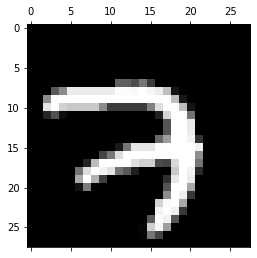

In [4]:
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train1.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()

### Second Type of noise

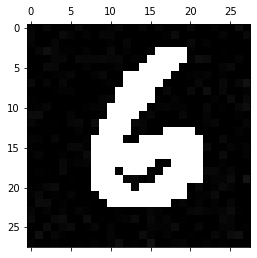

[1]


In [5]:
noisy_train2=train[6000:6500]
noise_factor = 0.01
label=noisy_train2['label']
clean_signal = pd.DataFrame(noisy_train2, dtype=float) 
clean_signal = noisy_train2.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(500, 784)) 
x_train_noisy = np.clip(x_train_noisy, 0, 0.4)
noisy_train2 = pd.concat([label,x_train_noisy], axis=1)
#assigning labels
noisy_train2 = noisy_train2.assign(label=1)
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train2.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()
print(np.unique(noisy_train2['label']))

### Third

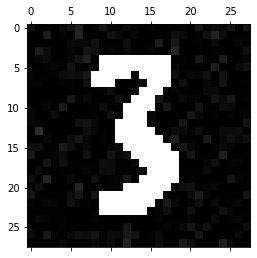

[1]


In [6]:
noisy_train3=train[6500:6700]
noise_factor = 0.1
label=noisy_train3['label']
clean_signal = pd.DataFrame(noisy_train3, dtype=float) 
clean_signal = noisy_train3.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(200, 784)) 
x_train_noisy = np.clip(x_train_noisy, 0, 2)
noisy_train3 = pd.concat([label,x_train_noisy], axis=1)
#assigning labels
noisy_train3 = noisy_train3.assign(label=1)
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train3.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()
print(np.unique(noisy_train3['label']))

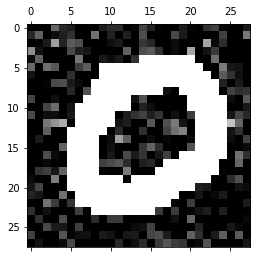

[1]


In [7]:
noisy_train4=train[6700:6750]
noise_factor = 0.5
label=noisy_train4['label']
clean_signal = pd.DataFrame(noisy_train4, dtype=float) 
clean_signal = noisy_train4.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(50, 784)) 
x_train_noisy = np.clip(x_train_noisy, 0, 2)
noisy_train4 = pd.concat([label,x_train_noisy], axis=1)
#assigning labels
noisy_train4 = noisy_train4.assign(label=1)
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train4.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()
print(np.unique(noisy_train4['label']))

In [8]:
train_noisy_all=pd.concat([noisy_train1,noisy_train2,noisy_train3,noisy_train4],ignore_index=True)
#train_all2 = pd.concat([train_reduced,noisy_train],ignore_index=True)

In [10]:
df_x_noisy=train_noisy_all.iloc[:,1:]
df_y_noisy=train_noisy_all.iloc[:,0]
df_y_noisy.value_counts().sort_index()
#Split the dataset
X_train6, X_test6, y_train6, y_test6 = train_test_split(df_x_noisy, df_y_noisy, test_size=0.2, random_state=0,shuffle=True)

X_train6.shape,X_test6.shape



((1400, 784), (350, 784))

In [11]:
X_train6=X_train6/255
X_test6=X_test6/255
X_train6=X_train6.to_numpy()
X_test6=X_test6.to_numpy()
from tensorflow.keras.utils import to_categorical
Y_cat_test6 = to_categorical(y_test6,10)
Y_cat_train6 = to_categorical(y_train6,10)
X_train6 = X_train6.reshape(X_train6.shape[0], 28, 28,1)
X_test6 = X_test6.reshape(X_test6.shape[0],28,28,1)
X_test6.shape,Y_cat_test6.shape

((350, 28, 28, 1), (350, 10))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model6 = Sequential()
model6.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
#model.add(MaxPool2D(pool_size=(2, 2)))
model6.add(Flatten())
model6.add(Dense(32, activation='relu'))
model6.add(Dense(10, activation='softmax'))
model6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 



In [13]:
model6.fit(X_train6,Y_cat_train6,epochs=16,validation_data=(X_test6,Y_cat_test6))

Epoch 1/16
44/44 [==============================] - 2s 29ms/step - loss: 0.2300 - accuracy: 0.9771 - val_loss: 4.7377e-07 - val_accuracy: 1.0000
Epoch 2/16
44/44 [==============================] - 1s 23ms/step - loss: 2.6728e-07 - accuracy: 1.0000 - val_loss: 1.8971e-07 - val_accuracy: 1.0000
Epoch 3/16
44/44 [==============================] - 1s 23ms/step - loss: 1.9576e-07 - accuracy: 1.0000 - val_loss: 1.8835e-07 - val_accuracy: 1.0000
Epoch 4/16
44/44 [==============================] - 1s 22ms/step - loss: 1.9576e-07 - accuracy: 1.0000 - val_loss: 1.8801e-07 - val_accuracy: 1.0000
Epoch 5/16
44/44 [==============================] - 1s 21ms/step - loss: 1.9576e-07 - accuracy: 1.0000 - val_loss: 1.8801e-07 - val_accuracy: 1.0000
Epoch 6/16
44/44 [==============================] - 1s 21ms/step - loss: 1.9550e-07 - accuracy: 1.0000 - val_loss: 1.8767e-07 - val_accuracy: 1.0000
Epoch 7/16
44/44 [==============================] - 1s 22ms/step - loss: 1.9533e-07 - accuracy: 1.0000 - val_l

In [15]:
list(map(lambda x: x.name, model6.layers))

['conv2d', 'flatten', 'dense', 'dense_1']

In [20]:
from tensorflow.keras.models import Model
#check the names of the layers above
intermediate_layer_model6 = Model(inputs=model6.input, outputs=model6.get_layer('dense_1').output)



In [21]:
resized_images=[]
for image in X_train6:
    image=image.reshape((1,28,28,1))
    resized_images.append(image)

output=[]
for image in resized_images:
    intermediate_output = intermediate_layer_model6.predict(image)
    output.append(intermediate_output)

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


In [22]:
y6=np.array([np.array(xi) for xi in output])
print(y6.shape)
y_new6=y6.reshape(y6.shape[0],y6.shape[2])
y_new6.shape

(1400, 1, 10)


(1400, 10)

In [23]:
import pandas 
import pandas as pd
pd = pandas.DataFrame(y_new6)
pd.to_csv("noisy_samples_second_layer_10_new.csv", index=False, header=False,line_terminator=',\n')

### Generating different noisy data for predictions

In [5]:
#First type #noisy_data_predictions1
noisy_data_predictions1=train[8000:8100]
noisy_data_predictions1['10x17'] = noisy_data_predictions1['10x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['11x17'] = noisy_data_predictions1['11x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['12x17'] = noisy_data_predictions1['12x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['13x17'] = noisy_data_predictions1['13x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['14x17'] = noisy_data_predictions1['14x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['15x17'] = noisy_data_predictions1['15x17'].replace(0, 0.5, regex=True)
#noisy_data_predictions1 = noisy_data_predictions1.drop('label', axis=1)

#Second Type 

noisy_data_predictions2=train[8100:8200]
noise_factor2 = 0.01
label2=noisy_data_predictions2['label']
clean_signal = pd.DataFrame(noisy_data_predictions2, dtype=float) 
clean_signal = noisy_data_predictions2.drop('label', axis=1)
noisy_data_predictions2 = clean_signal + noise_factor2 * np.random.normal(loc=0.0, scale=1.0, size=(100, 784)) 
noisy_data_predictions2= np.clip(noisy_data_predictions2, 0, 0.4)
noisy_data_predictions2= pd.concat([label2,noisy_data_predictions2], axis=1)
#Third type
noise_factor3 = 0.1
noisy_data_predictions3=train[8200:8300]
label3=noisy_data_predictions3['label']
clean_signal2 = pd.DataFrame(noisy_data_predictions3, dtype=float) 
clean_signal2 = noisy_data_predictions3.drop('label', axis=1)
noisy_data_predictions3 = clean_signal2 + noise_factor3 * np.random.normal(loc=0.0, scale=1.0, size=(100, 784))
noisy_data_predictions3  = np.clip(noisy_data_predictions3, 0, 2)
noisy_data_predictions3= pd.concat([label3,noisy_data_predictions3], axis=1)

#Fourth type
noisy_data_predictions4=train[8300:8400]
noise_factor4 = 0.5
label4=noisy_data_predictions4['label']
clean_signal = pd.DataFrame(noisy_data_predictions4, dtype=float) 
clean_signal = noisy_data_predictions4.drop('label', axis=1)
noisy_data_predictions4 = clean_signal + noise_factor4 * np.random.normal(loc=0.0, scale=1.0, size=(100, 784)) 
noisy_data_predictions4 = np.clip(noisy_data_predictions4 , 0, 2)
noisy_data_predictions4= pd.concat([label4,noisy_data_predictions4], axis=1)


In [23]:
# First type
df_x_noisy=noisy_data_predictions4.iloc[:,1:]
df_y_noisy=noisy_data_predictions4.iloc[:,0]
df_y_noisy.value_counts().sort_index()
#Split the dataset
X_train6, X_test6, y_train6, y_test6 = train_test_split(df_x_noisy, df_y_noisy, test_size=0.2, random_state=0,shuffle=True)

X_train6=X_train6/255
X_test6=X_test6/255
X_train6=X_train6.to_numpy()
X_test6=X_test6.to_numpy()
from tensorflow.keras.utils import to_categorical
Y_cat_test6 = to_categorical(y_test6,10)
Y_cat_train6 = to_categorical(y_train6,10)
X_train6 = X_train6.reshape(X_train6.shape[0], 28, 28,1)
X_test6 = X_test6.reshape(X_test6.shape[0],28,28,1)
X_test6.shape,Y_cat_test6.shape

((20, 28, 28, 1), (20, 10))

In [24]:
model7 = Sequential()
model7.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
#model.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Flatten())
model7.add(Dense(32, activation='relu'))
model7.add(Dense(10, activation='softmax'))
model7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [25]:
model7.fit(X_train6,Y_cat_train6,epochs=16,validation_data=(X_test6,Y_cat_test6))

Epoch 1/16
3/3 [==============================] - 1s 131ms/step - loss: 2.3018 - accuracy: 0.1125 - val_loss: 2.2959 - val_accuracy: 0.0500
Epoch 2/16
3/3 [==============================] - 0s 53ms/step - loss: 2.2845 - accuracy: 0.1625 - val_loss: 2.2783 - val_accuracy: 0.0500
Epoch 3/16
3/3 [==============================] - 0s 53ms/step - loss: 2.2459 - accuracy: 0.1625 - val_loss: 2.2776 - val_accuracy: 0.0500
Epoch 4/16
3/3 [==============================] - 0s 51ms/step - loss: 2.2212 - accuracy: 0.1625 - val_loss: 2.3066 - val_accuracy: 0.0500
Epoch 5/16
3/3 [==============================] - 0s 51ms/step - loss: 2.2413 - accuracy: 0.1625 - val_loss: 2.3434 - val_accuracy: 0.0500
Epoch 6/16
3/3 [==============================] - 0s 51ms/step - loss: 2.2273 - accuracy: 0.1625 - val_loss: 2.3126 - val_accuracy: 0.0500
Epoch 7/16
3/3 [==============================] - 0s 70ms/step - loss: 2.2074 - accuracy: 0.1625 - val_loss: 2.2931 - val_accuracy: 0.0500
Epoch 8/16
3/3 [==========

In [30]:
list(map(lambda x: x.name, model7.layers))

['conv2d_2', 'flatten_1', 'dense_2', 'dense_3']

In [36]:
from tensorflow.keras.models import Model
#check the names of the layers above
intermediate_layer_model6 = Model(inputs=model7.input, outputs=model7.get_layer('dense_3').output)

In [37]:
resized_images=[]
for image in X_train6:
    image=image.reshape((1,28,28,1))
    resized_images.append(image)

In [38]:
output=[]
for image in resized_images:
    intermediate_output = intermediate_layer_model6.predict(image)
    output.append(intermediate_output)

1/1 [==============================] - 0s 30ms/step


In [39]:
y6=np.array([np.array(xi) for xi in output])
print(y6.shape)
y_new6=y6.reshape(y6.shape[0],y6.shape[2])
y_new6.shape

(80, 1, 10)


(80, 10)

In [40]:
import pandas 
import pandas as pd
pd = pandas.DataFrame(y_new6)
pd.to_csv("noisy_samples_fourth_type_second_layer.csv", index=False, header=False,line_terminator=',\n')